<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

In [2]:
# load sat_scores and make data frame by read_csv.
sat=pd.read_csv('sat_scores.csv')
# summarizes data with describe function.
sat.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [3]:
#check data type
sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
# look at the first ten rows. head (num)
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


Our data includes US states + DC and average of data at last line. Rate shows rate of participation on each states, and average score for verbal and math scores. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [5]:
sat.shape

(52, 4)

* data shape is 52 rows and 4 columns.

In [6]:
# create data dictionary.
name=sat.dtypes.to_frame()

# create list for showing range of each index.
range_data = ["U.S. State with DC", "0-100", "0-800", "0-800"]

# add range column to 'data dictionary' dataframe.
name["Range"]=range_data

# create description list
desc=["State abbreviation", "Participation_Rate_by_state", "Verbal_Score_by_state", "Math_Score_by_state"]

# add description column to 'data dictionary' dataframe.
name["Description"]=desc

# reset index 
name.reset_index(inplace=True)

# rename as type
name.rename(columns= {'index': 'Index', 0:"Type"}, inplace=True)
name

,Index,Type,Range,Description
0,State,object,U.S. State with DC,State abbreviation
1,Rate,int64,0-100,Participation_Rate_by_state
2,Verbal,int64,0-800,Verbal_Score_by_state
3,Math,int64,0-800,Math_Score_by_state


In [7]:
sat.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [8]:
# Last line is 'All', which is the average of the data. Therefore, when I do EDA, it is a duplicated data.
# Therefore, I decide to delete it.
sat.drop(sat.index[51], inplace=True)

In [9]:
# check its inplace.
sat.tail()

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

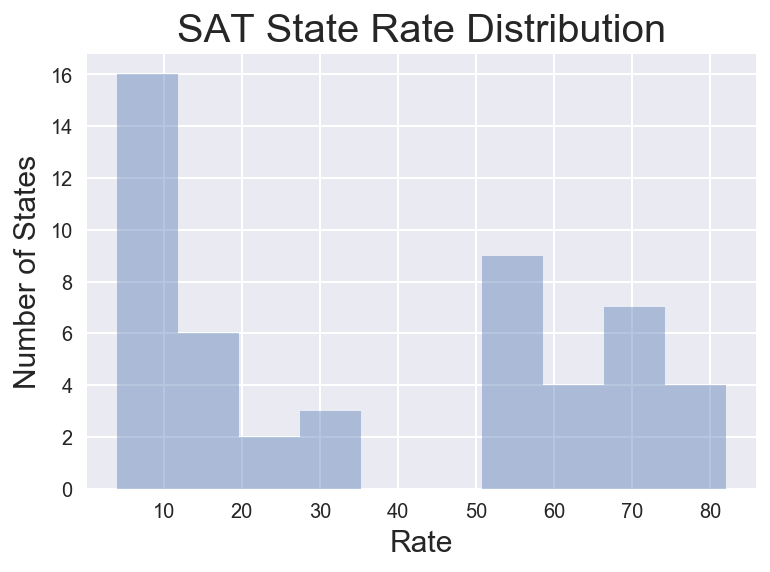

In [10]:
# using distplot to plot the distribution of rate.
rate_dist = plt.axes()
sns.distplot(sat['Rate'], kde=False, bins=10, ax=rate_dist)

# set title and x,y label. 
rate_dist.set_title("SAT State Rate Distribution", fontdict={'fontsize': 20})
rate_dist.set_ylabel("Number of States", fontdict={'fontsize':15})
rate_dist.set_xlabel("Rate",fontdict={'fontsize':15})


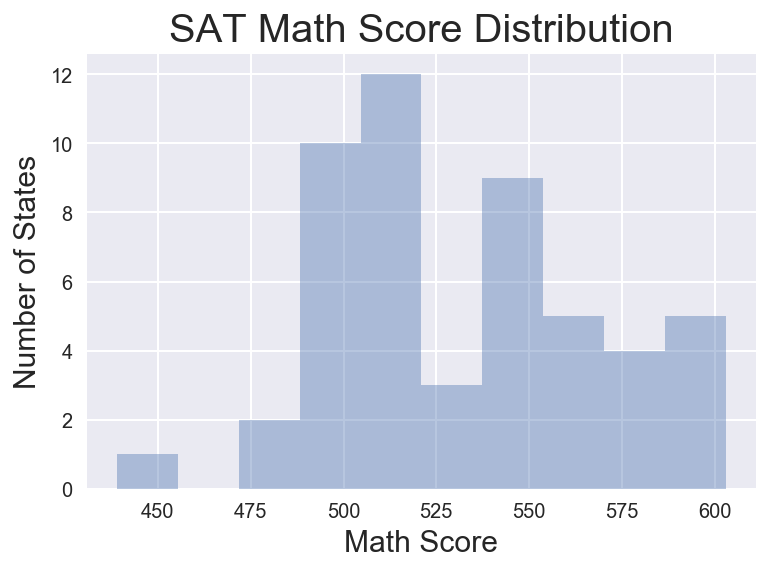

In [11]:
# plot the distribution of SAT math score.
math_dist = plt.axes()
sns.distplot(sat['Math'], kde=False, bins=10, ax=math_dist)

# Set title and x,y label.
math_dist.set_title("SAT Math Score Distribution", fontdict={'fontsize': 20})
math_dist.set_ylabel("Number of States", fontdict={'fontsize':15})
math_dist.set_xlabel("Math Score",fontdict={'fontsize':15})



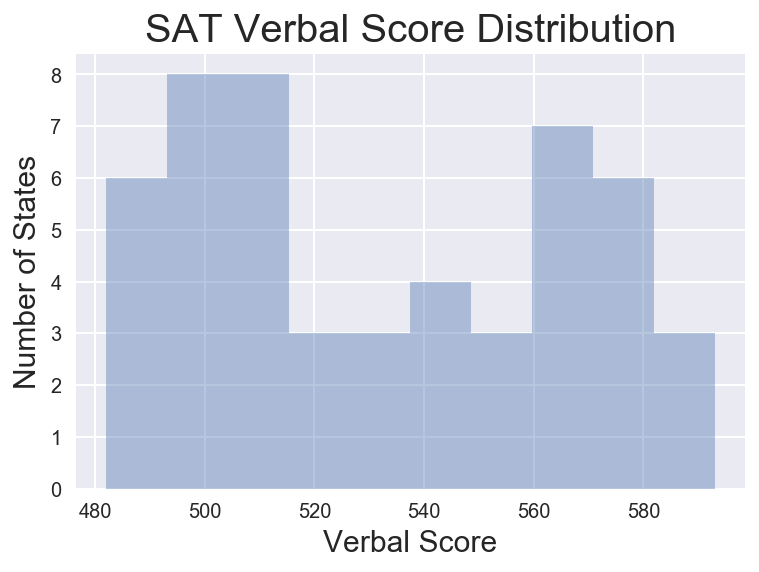

In [12]:
# Plot the distrubutin of SAT verbal.
verbal_dist = plt.axes()
sns.distplot(sat['Verbal'], kde=False, bins=10, ax=verbal_dist)

# Set title and x,y label.
verbal_dist.set_title("SAT Verbal Score Distribution", fontdict={'fontsize': 20})
verbal_dist.set_ylabel("Number of States", fontdict={'fontsize':15})
verbal_dist.set_xlabel("Verbal Score",fontdict={'fontsize':15})

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

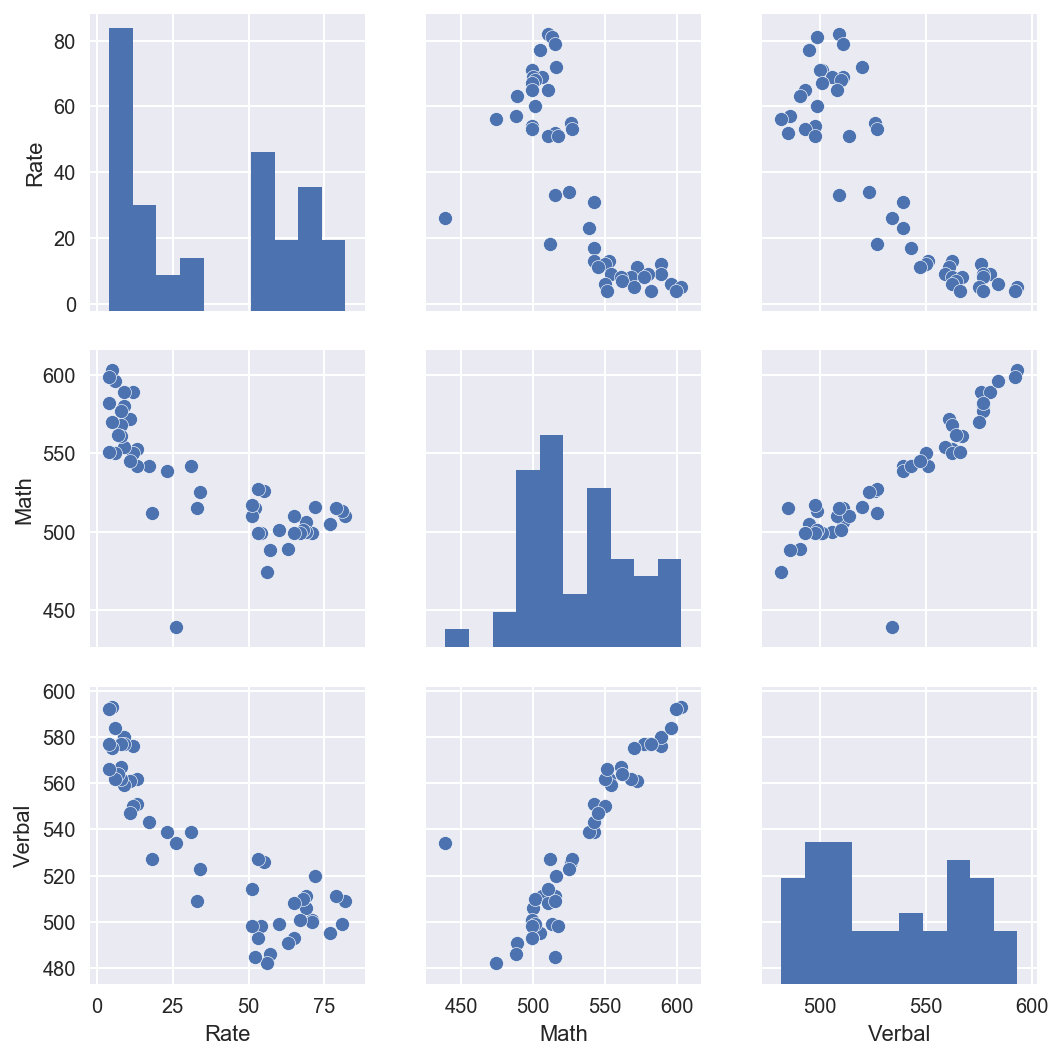

In [13]:
# Using seaborn's pairplot, show joint distribution for all categories.
sns.pairplot(sat[['Rate','Math', 'Verbal']])

* pariplot shows that many states shows both high scores on math and verbal. Math and Verbal seems positive relationship. 
* Low participation rate state shows higher on both scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

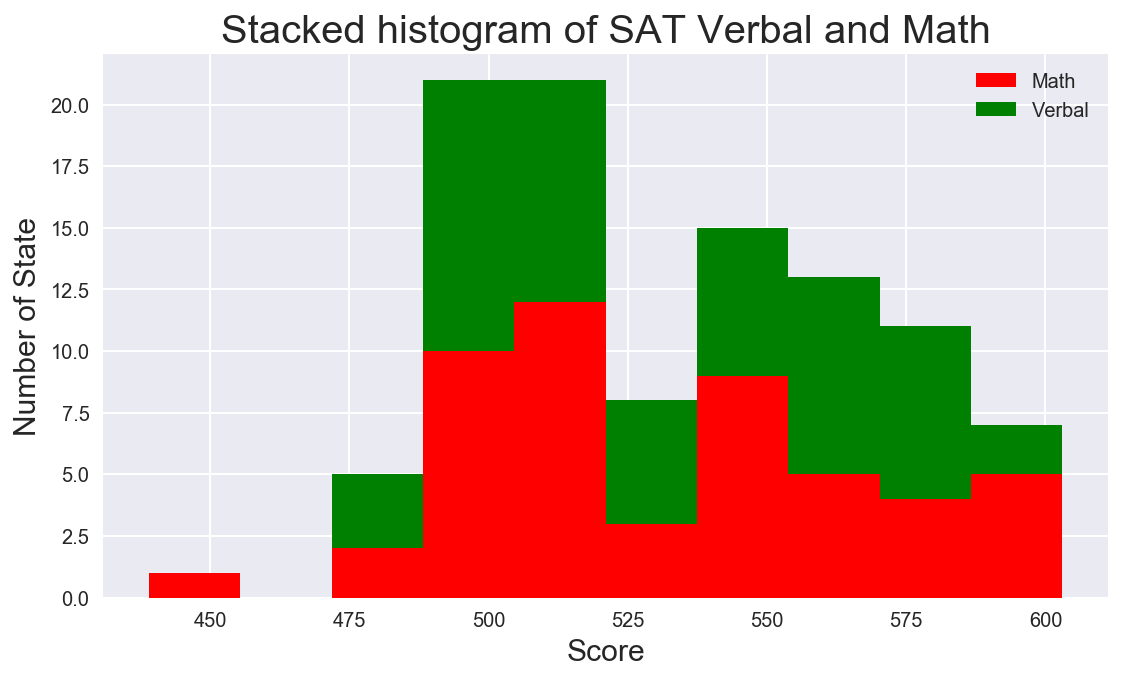

In [14]:
# created histogram for verbal and Math
fig, ax = plt.subplots(figsize=(9, 5))
verbal=sat.iloc[:,2]
math=sat.iloc[:,3]
labels=["Math", "Verbal"]
ax.hist([math,verbal], stacked=True, label=labels, color=['red', 'green'])
ax.legend()
ax.set_title("Stacked histogram of SAT Verbal and Math", fontdict={'fontsize': 20})
ax.set_ylabel("Number of State", fontdict={'fontsize':15})
ax.set_xlabel("Score",fontdict={'fontsize':15})

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

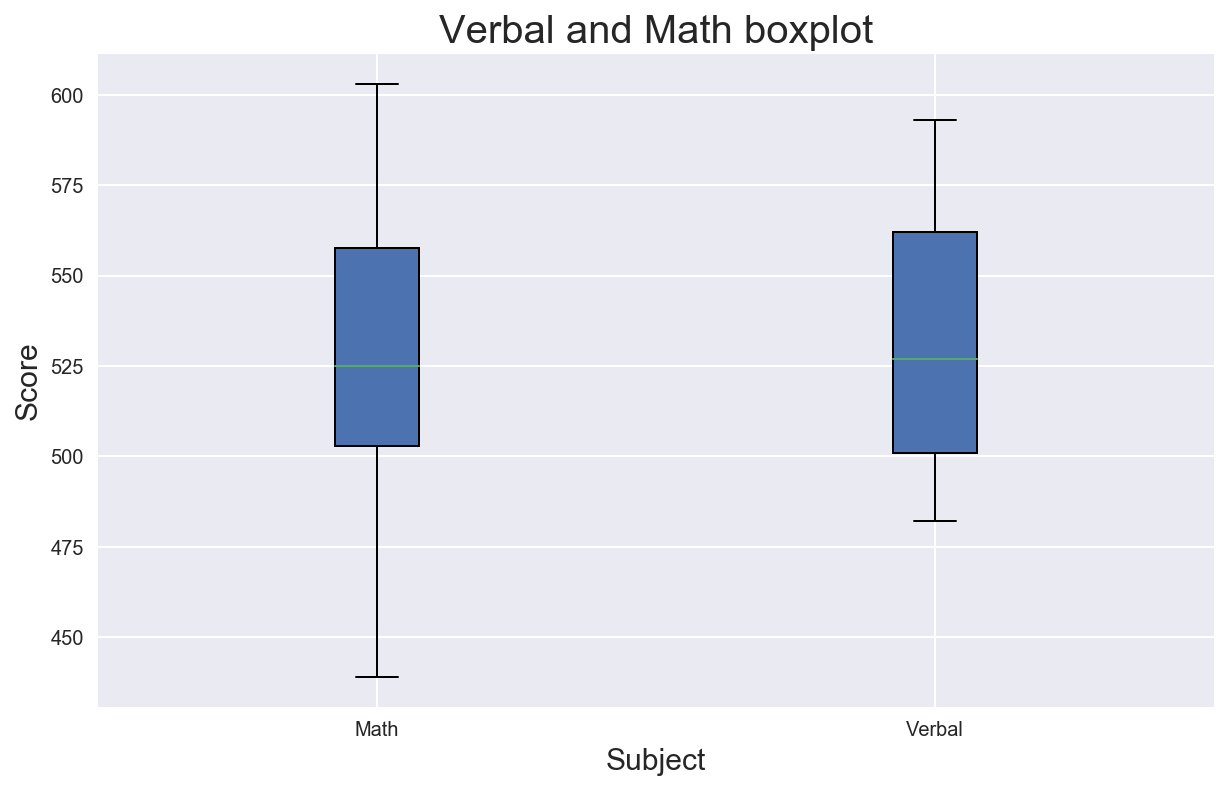

In [15]:
# create subplots with fig size
fig, ax = plt.subplots(figsize=(10, 6))

# create data tuple for both math and verbal.
ver_mat=sat['Math'],sat['Verbal']
# print(type(ver_mat))  --> double check

# labels for x-axis
labels=["Math", "Verbal"]


# create boxplot
vmbox = ax.boxplot(ver_mat, patch_artist=True, labels=labels)

# set title and x,y label.
ax.set_title("Verbal and Math boxplot", fontdict={'fontsize': 20})
ax.set_ylabel('Score', fontdict={'fontsize': 15})
ax.set_xlabel('Subject', fontdict={'fontsize': 15})

1.  What are the benefits of using a boxplot as compared to a scatterplot or a histogram? 

A. Boxplot shows distribution of each score easily, and outliner as well.

2. What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

A. y-scale of box-plot rate are limit to 100, so there are large gap if we put them on same chart, just like next line.

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


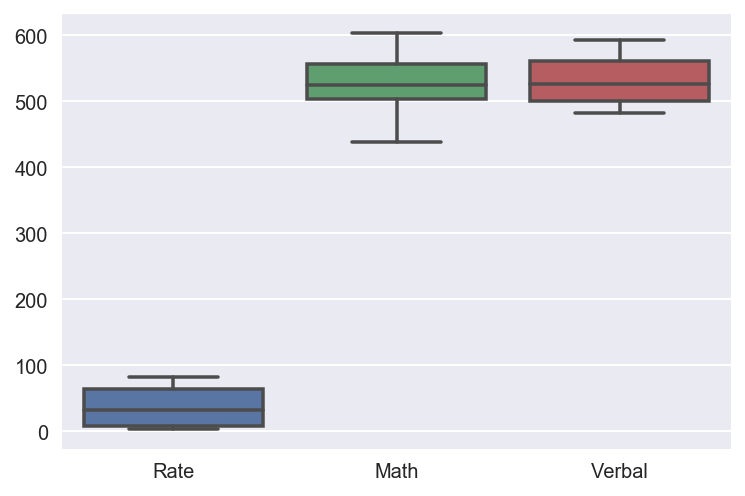

In [16]:
sns.boxplot(sat[['Rate','Math', 'Verbal']])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [17]:
# To put three different column on same boxplot, I choose z-score
# Z-score is showing numbers of stardard deviation from mean of each data. Therefore, variations are limited from -4 to 4.
# import z-score from scipy.stats
from scipy.stats import zscore

In [18]:
# Using pandas apply, create zscore dataframe
sat_zscore=sat[['Rate', 'Verbal', 'Math']].apply(zscore)

# check zscore dataframe
sat_zscore


,Rate,Verbal,Math
0,1.649606,-0.712322,-0.607938
1,1.612948,-1.015059,-0.524442
2,1.539632,-0.651775,-0.468778
3,1.466317,-1.136154,-0.747098
4,1.283027,-0.379312,-0.440946
5,1.246369,-0.954512,-0.914090
6,1.246369,-0.984785,-0.914090
7,1.173053,-0.651775,-0.719266
8,1.173053,-0.803143,-0.886258
9,1.136395,-0.682048,-0.858426


/Users/jasonjklim/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


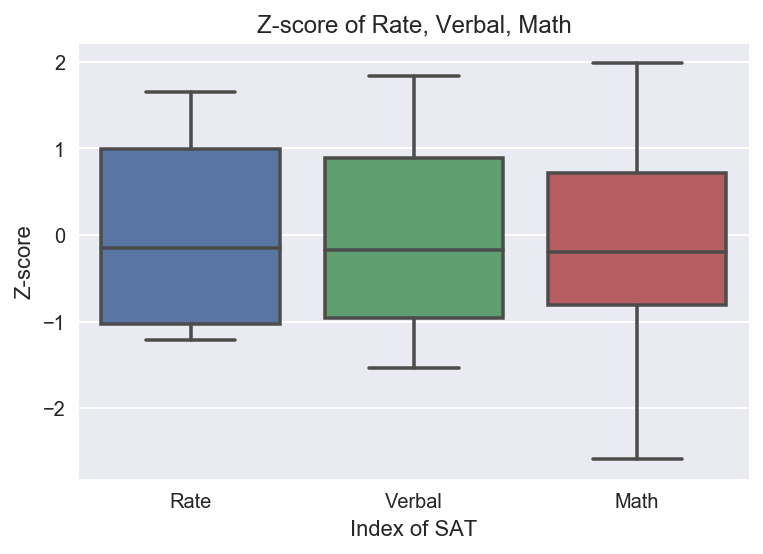

In [19]:
# making plot with seaborn boxplot
zscore = sns.boxplot(sat_zscore)
zscore.set(xlabel='Index of SAT', ylabel='Z-score', title="Z-score of Rate, Verbal, Math")

* By zscore boxplot, I can see the distribution from mean of each set of data by z-score. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [20]:
# use numpy, get average of verbal column
np.average(sat.iloc[:,2])

532.52941176470586

In [21]:
# Using list comprehension, create list of states where verbal score is greater than the average. And count them.

above_avg_verbal=[v["State"] for k,v in sat.iterrows() if v["Verbal"] > np.average(sat.iloc[:,2])]
print(len(above_avg_verbal))
print(above_avg_verbal)

24
['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


* There are 24 states are greater than average verbal scores.
* There are 50+1 states, so it's positive skewed distribution.

### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
np.median(sat.iloc[:,2])

527.0

In [23]:
above_med_verbal=[v["State"] for k,v in sat.iterrows() if v["Verbal"] > np.median(sat.iloc[:,2])]
print(above_med_verbal)

['CO', 'OH', 'MT', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


* Median is less than mean, but number of states are same because there are gap 
* Between high score states group and lower score statesgroup.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [24]:
# creating Difference column.
sat['Difference']=sat["Verbal"]-sat["Math"]
sat.head()

,State,Rate,Verbal,Math,Difference
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [25]:
# top 10 states that shows greatest gap between Verbal and Math where Verbal is greater than Math.
vbg = sat.sort_values('Difference', ascending=False).head(10)
# change indexes, starts from 1.
vbg.index=np.arange(1, len(vbg)+1)
# shows top 3
vbg.head(3)


,State,Rate,Verbal,Math,Difference
1,OH,26,534,439,95
2,MS,4,566,551,15
3,WV,18,527,512,15


In [26]:
# top 10 states that shows greatest gap between Verbal and Math such that Math is greater than Verbal. 
mtg = sat.sort_values('Difference').head(10)
# change minus to plus
mtg['Difference'] = mtg['Difference']*-1

# change indexes, starts from 1.
mtg.index= np.arange(1, len(mtg)+1)
# shows top 3
mtg.head(3)


,State,Rate,Verbal,Math,Difference
1,HI,52,485,515,30
2,CA,51,498,517,19
3,NJ,81,499,513,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


In [27]:
# getting correlation matrix by corr()
corr_sat =  sat[['Rate', 'Verbal', 'Math']].corr()
corr_sat

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


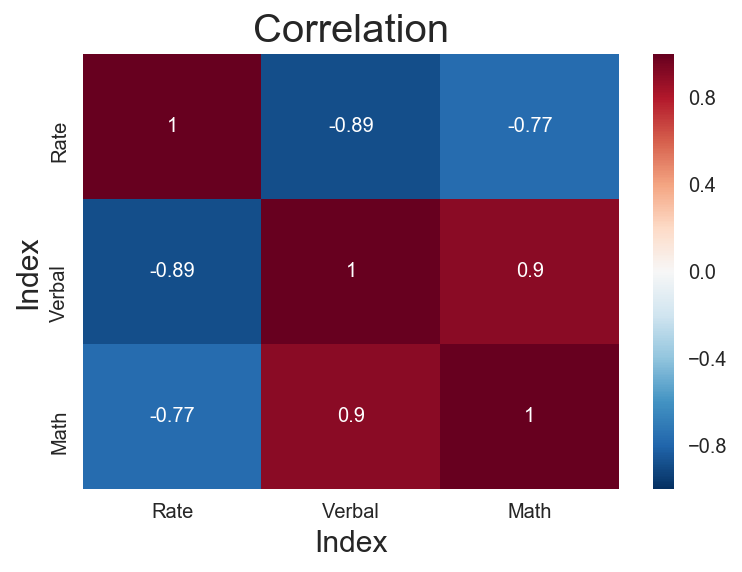

In [28]:
# use seaborn;s heatmap method to check its correlation.
heatmap = sns.heatmap(corr_sat, annot=True)


heatmap.set_title("Correlation", fontdict={'fontsize': 20})
heatmap.set_ylabel('Index', fontdict={'fontsize': 15})
heatmap.set_xlabel('Index', fontdict={'fontsize': 15})

* Correlation heatmap and data shows that there are strong correlationship between verbal and math

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
sat.describe()

,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


Explain describe()

* Count is how many datas on each columns.
* Mean is average is numeric values on the columns.
* Standard deviation is standard deviation- show amount of variation on data.
* Min is minimun value
* 25%, 50% 75% is showing percentile of the data. 50% is median.
* Max is maximum value on the data.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

Describe how the covariance matrix is different from the correlation matrix

* Their ranges are different. Covariance is showing how one's responds due to one's changes. Correlation is covariance divided by standard deviation. So, variable for correlation is between -1 and 1.

What is the process to convert the covariance into the correlation?

* Cov(x,y) is divided by standard deviation for x and y. 

Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

* Just like standard deviation insted of variance, correlation is preferred because its normalized the data between -1 to 1 scale. Covariance is showing how two variables's relationship as both variables are changing, so it can be different scales. Correlation shows that change with selective scale, so it is more understandable.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [30]:
# read csv by pandas
drug = pd.read_csv('drug-use-by-age.csv')
drug

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [31]:
drug.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


In [32]:
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [33]:
# I need to change some columns series, so we can have missing values.

# function to change '-' to np.nan and apply to change data type
drug = drug.apply(lambda x: x.str.strip() if isinstance(x, float) else x).replace('-', np.nan)
        

In [34]:
# change whole column types that are not float which they should be.
drug[['cocaine-frequency', 'crack-frequency', 'heroin-frequency','inhalant-frequency', 
      'oxycontin-frequency', 'meth-frequency']] = drug[['cocaine-frequency', 'crack-frequency', 'heroin-frequency','inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']].astype(float)


In [35]:
# check type of columns one more time.
drug.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [36]:
# checking the missing data.
drug.isnull().sum()

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

How will this affect your approach to EDA on the data?
 * There are some missing values on the some of datas. It will disconnect my data if I do EDA. Therefore, I will fill with previous values.

In [37]:
drug.fillna(method='ffill', inplace=True)

In [38]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,3.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


I will leave crack-frequency Age of 12 as missing value because I cannot make it 0, which can mean crack use, but no frequency and is not true and I can work EDA, which start from Age of 13.

In [39]:
# rename pain-reliever because of mistake
drug.rename(columns={'pain-releiver-use': 'pain-reliever-use', 'pain-releiver-frequency': 'pain-reliever-frequency'}, inplace=True)
drug.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-reliever-use', 'pain-reliever-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [40]:
# Using correlated function, check how frequency of each drugs are related.
# creating frequency data frame.
drug_freq=drug[['alcohol-frequency', 'marijuana-frequency', 'cocaine-frequency', 'crack-frequency', 
                   'heroin-frequency','hallucinogen-frequency', 'inhalant-frequency', 'pain-reliever-frequency', 
                   'oxycontin-frequency','tranquilizer-frequency', 'stimulant-frequency', 'meth-frequency', 
                   'sedative-frequency']]
corr_drug = drug_freq.corr()
corr_drug

,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-reliever-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
alcohol-frequency,1.000000,0.818769,0.435765,0.421794,0.401398,-0.174622,-0.198400,0.007087,0.072160,-0.415026,0.260304,0.236812,0.201423
marijuana-frequency,0.818769,1.000000,0.123174,0.047385,0.305153,-0.380430,-0.591131,-0.285292,0.058327,-0.591449,-0.069454,0.320374,0.048777
cocaine-frequency,0.435765,0.123174,1.000000,0.916145,0.248816,0.323403,0.492911,0.152082,-0.299177,-0.207363,0.699455,0.098295,0.551367
crack-frequency,0.421794,0.047385,0.916145,1.000000,0.383867,0.547047,0.757225,0.374865,-0.225798,-0.270926,0.616671,0.196862,0.469551
heroin-frequency,0.401398,0.305153,0.248816,0.383867,1.000000,-0.197889,0.070268,-0.037599,-0.068693,-0.232116,0.213313,0.846616,-0.196819
hallucinogen-frequency,-0.174622,-0.380430,0.323403,0.547047,-0.197889,1.000000,0.747622,0.547363,0.052619,0.705734,-0.103980,-0.079365,0.533095
inhalant-frequency,-0.198400,-0.591131,0.492911,0.757225,0.070268,0.747622,1.000000,0.637492,0.141398,0.653632,0.358439,0.014793,0.339699
pain-reliever-frequency,0.007087,-0.285292,0.152082,0.374865,-0.037599,0.547363,0.637492,1.000000,0.452577,0.699282,0.324717,-0.002492,-0.045213
oxycontin-frequency,0.072160,0.058327,-0.299177,-0.225798,-0.068693,0.052619,0.141398,0.452577,1.000000,0.428590,-0.203433,-0.044092,-0.120525
tranquilizer-frequency,-0.415026,-0.591449,-0.207363,-0.270926,-0.232116,0.705734,0.653632,0.699282,0.428590,1.000000,-0.180415,-0.383517,-0.014524


* Correlation dataframe shows different drug's frequency correlationship. Some of them are highly correlated such as stimulant and crack-frequency.

In [41]:
# check correlation of each drug's usage
# creating data frame for use
drug_use = drug[['alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use','hallucinogen-use', 
                 'inhalant-use', 'pain-reliever-use', 'oxycontin-use','tranquilizer-use', 'stimulant-use', 
                 'meth-use', 'sedative-use']]
corr_use = drug_use.corr()
corr_use



,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-reliever-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
alcohol-use,1.000000,0.594165,0.773458,0.877378,0.677614,0.463702,-0.648248,0.617523,0.589219,0.735785,0.582241,0.682531,0.318268
marijuana-use,0.594165,1.000000,0.883789,0.620670,0.711613,0.959353,0.127336,0.966226,0.971733,0.935199,0.968096,0.870446,0.616766
cocaine-use,0.773458,0.883789,1.000000,0.835727,0.899944,0.855668,-0.214609,0.906638,0.865626,0.920430,0.923954,0.889353,0.461914
crack-use,0.877378,0.620670,0.835727,1.000000,0.750790,0.556222,-0.543499,0.652764,0.603003,0.772651,0.618008,0.694324,0.438421
heroin-use,0.677614,0.711613,0.899944,0.750790,1.000000,0.683674,-0.215961,0.805868,0.775321,0.818583,0.808024,0.816620,0.333649
hallucinogen-use,0.463702,0.959353,0.855668,0.556222,0.683674,1.000000,0.173030,0.909333,0.916777,0.862900,0.940008,0.780071,0.518700
inhalant-use,-0.648248,0.127336,-0.214609,-0.543499,-0.215961,0.173030,1.000000,0.092045,0.110492,-0.103745,0.108381,-0.059903,0.110611
pain-reliever-use,0.617523,0.966226,0.906638,0.652764,0.805868,0.909333,0.092045,1.000000,0.976445,0.959283,0.961484,0.918051,0.636666
oxycontin-use,0.589219,0.971733,0.865626,0.603003,0.775321,0.916777,0.110492,0.976445,1.000000,0.955081,0.947492,0.895790,0.625929
tranquilizer-use,0.735785,0.935199,0.920430,0.772651,0.818583,0.862900,-0.103745,0.959283,0.955081,1.000000,0.909784,0.936270,0.674618


* From the usage data frame, usage of marijuana has highly correlated with other drugs.

In [42]:
drug.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,NaN,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,NaN,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,3.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


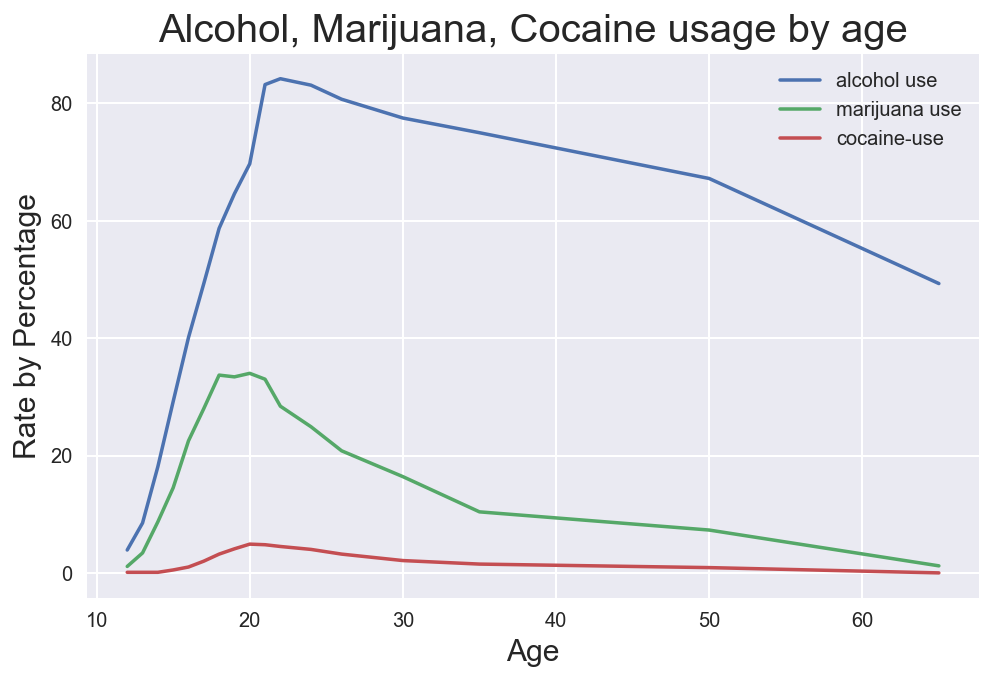

In [43]:
# create subplots with fig size
fig, ax = plt.subplots(figsize=(8,5))

# Create a list of x-vals, so age between 12-20 bins will have same bins size to 25 - 60.
xvals = [12,13,14,15,16,17,18,19,20,21,22,24,26,30,35,50,65]

# create plot
_ = ax.plot(xvals,drug['alcohol-use'], label='alcohol use')
_ = ax.plot(xvals,drug['marijuana-use'], label='marijuana use')
_ = ax.plot(xvals, drug['cocaine-use'], label='cocaine-use')
ax.legend()

# set title and x,y label.
plt.xlabel("Age", fontsize=15)
plt.ylabel("Rate by Percentage", fontsize=15)
plt.title("Alcohol, Marijuana, Cocaine usage by age", fontsize=20)



* After early 20s, alcohol and marijuana-use are descreased.

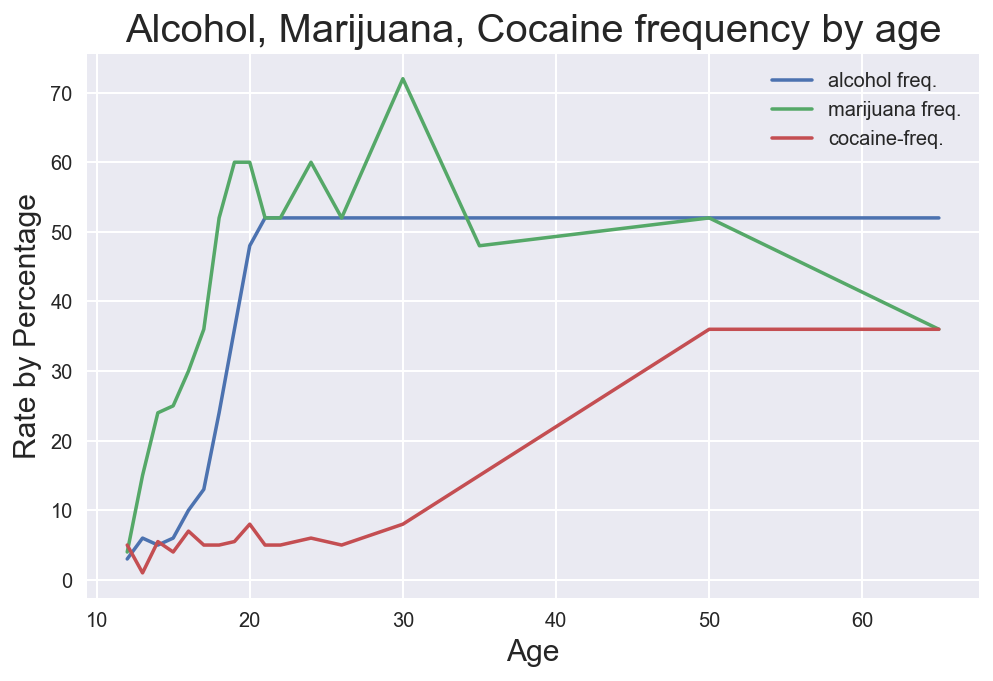

In [44]:
# create subplots with fig size
fig, ax = plt.subplots(figsize=(8, 5))

# create plot
_ = ax.plot(xvals,drug['alcohol-frequency'], label='alcohol freq.')
_ = ax.plot(xvals,drug['marijuana-frequency'], label='marijuana freq.')
_ = ax.plot(xvals,drug['cocaine-frequency'], label='cocaine-freq.')
ax.legend()

# set title and x,y label.
plt.xlabel("Age", fontsize=15)
plt.ylabel("Rate by Percentage", fontsize=15)
plt.title("Alcohol, Marijuana, Cocaine frequency by age", fontsize=20)


* Yet, frequency rate does not show decreasing sign by age. 
* Specially, Cocaine frequency is rapidly increased after 20s until 50s.


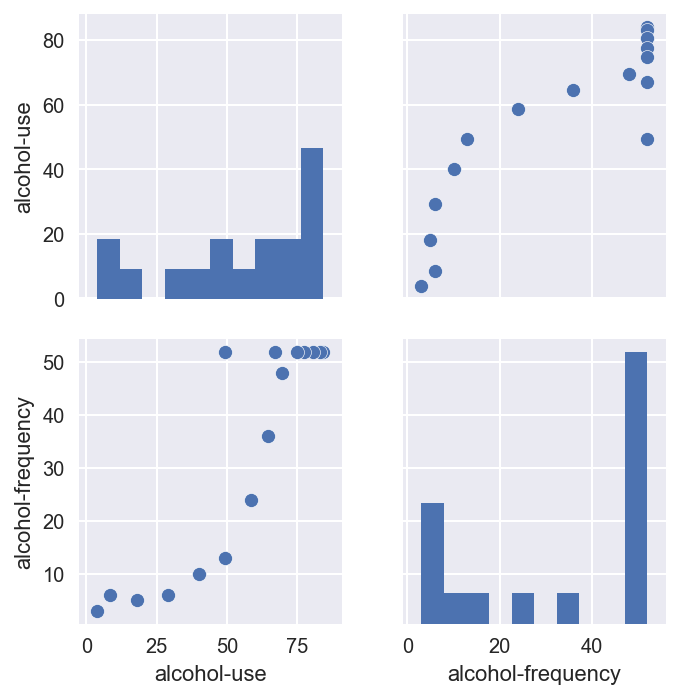

In [45]:
sns.pairplot(drug[['alcohol-use','alcohol-frequency']])

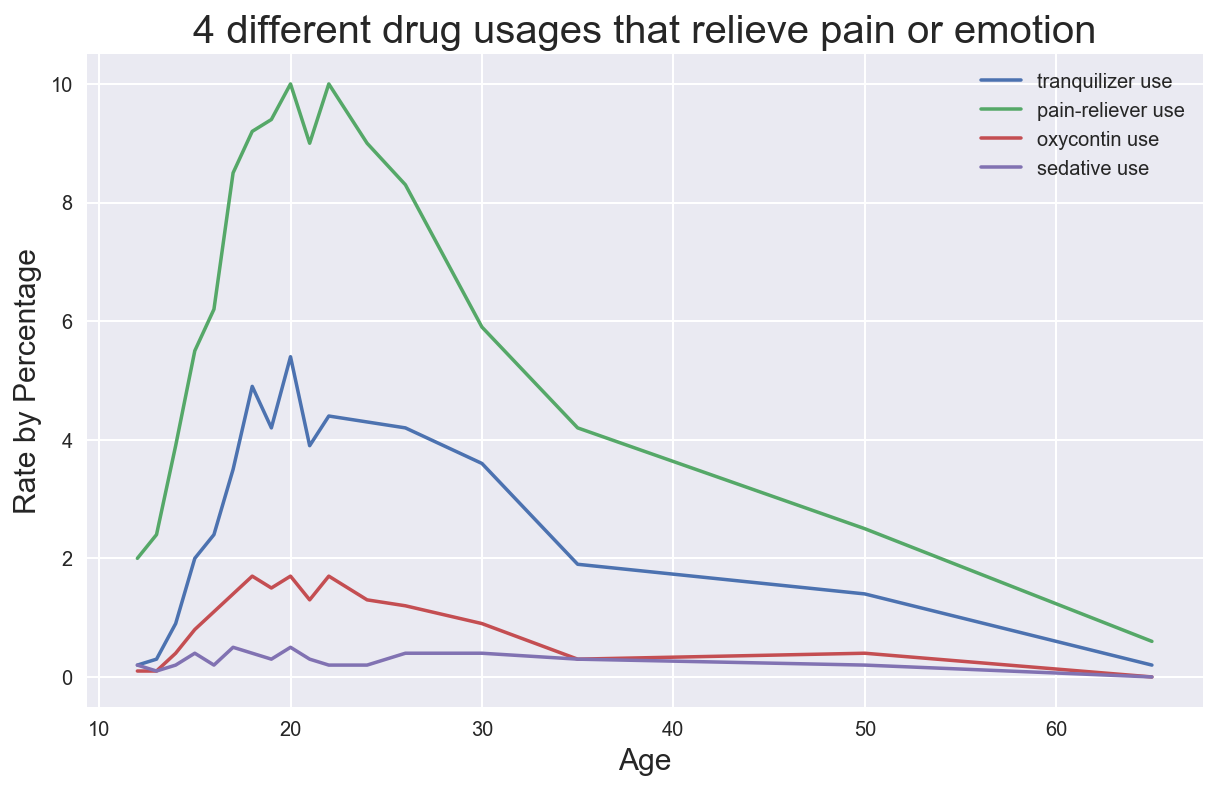

In [46]:

# create subplots with fig size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a list of x-vals, so age between 12-20 bins will have same bins size to 25 - 60.
xvals = [12,13,14,15,16,17,18,19,20,21,22,24,26,30,35,50,65]

# create plot
_ = ax.plot(xvals, drug['tranquilizer-use'], label='tranquilizer use')
_ = ax.plot(xvals, drug['pain-reliever-use'], label='pain-reliever use')
_ = ax.plot(xvals, drug['oxycontin-use'], label='oxycontin use')
_ = ax.plot(xvals,drug['sedative-use'], label='sedative use')
ax.legend()

# set title and x,y label.
plt.xlabel("Age", fontsize=15)
plt.ylabel("Rate by Percentage", fontsize=15)
plt.title("4 different drug usages that relieve pain or emotion", fontsize=20)

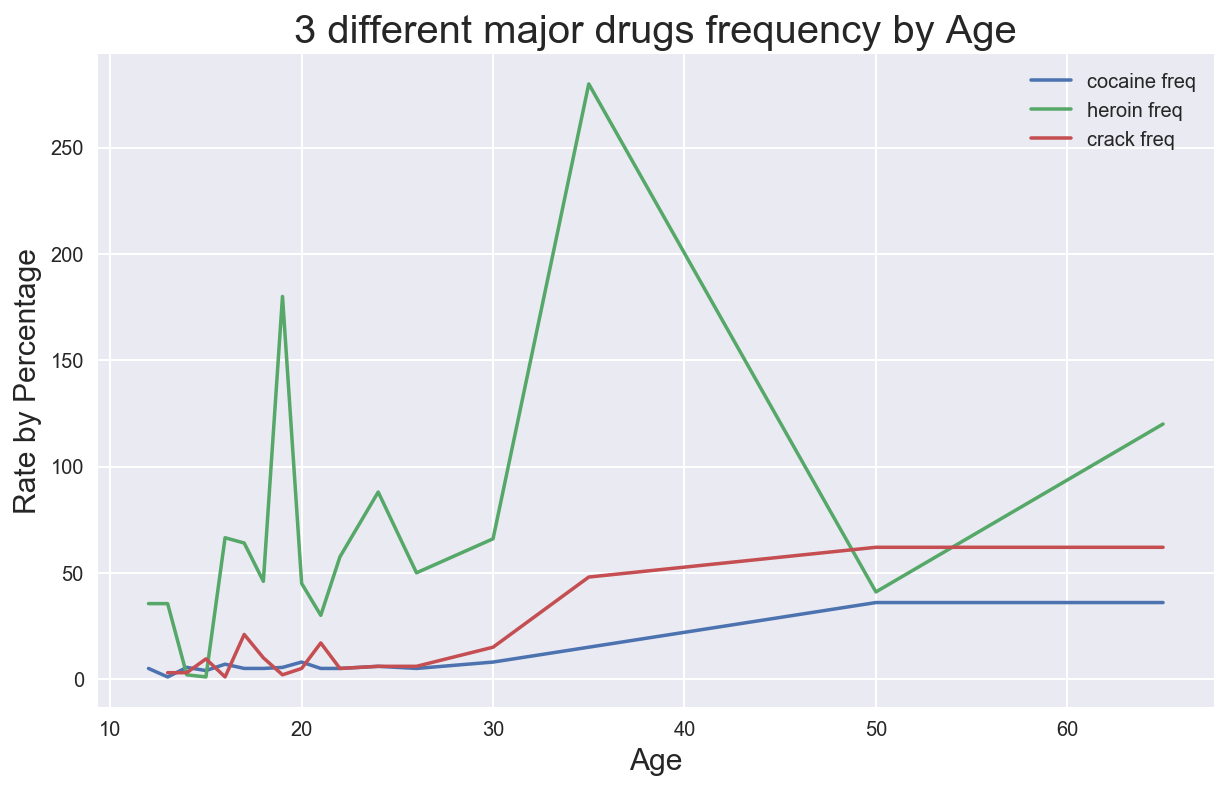

In [47]:
# create subplots with fig size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a list of x-vals, so age between 12-20 bins will have same bins size to 25 - 60.
xvals = [12,13,14,15,16,17,18,19,20,21,22,24,26,30,35,50,65]

# create plot
_ = ax.plot(xvals, drug['cocaine-frequency'], label='cocaine freq')
_ = ax.plot(xvals, drug['heroin-frequency'], label='heroin freq')
_ = ax.plot(xvals, drug['crack-frequency'], label='crack freq')
ax.legend()

# set title and x,y label.
plt.xlabel("Age", fontsize=15)
plt.ylabel("Rate by Percentage", fontsize=15)
plt.title("3 different major drugs frequency by Age", fontsize=20)

I can easily find out that heroin is the most addictive drug overall.

[<matplotlib.text.Text at 0x120ec95c0>, <matplotlib.text.Text at 0x1212b5080>]

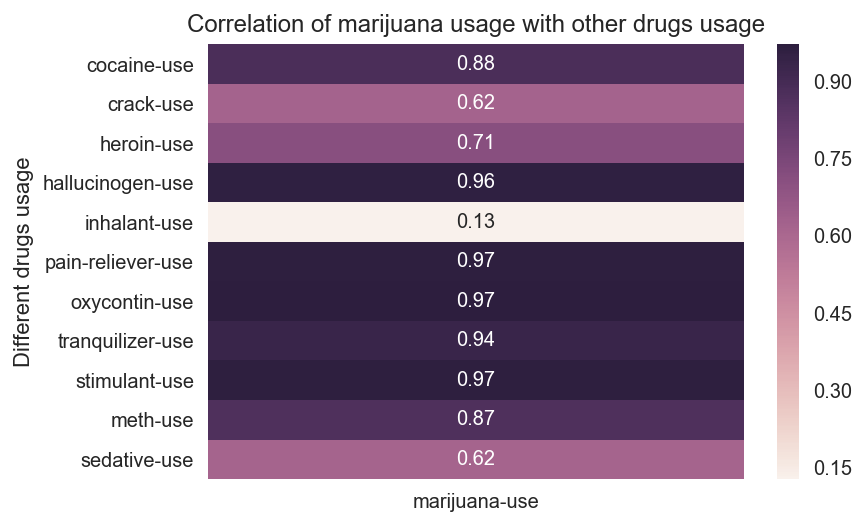

In [48]:
# Code
# First, take out all use data and create new data name, mari.
mari = drug[['marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use','hallucinogen-use', 
                 'inhalant-use', 'pain-reliever-use', 'oxycontin-use','tranquilizer-use', 'stimulant-use', 
                 'meth-use', 'sedative-use']]

# I want to know correlation of marijuana to other drugs. 
# Thus, I just take out corr() of marijuana-use column and making it data frame with to_frame.
mari_corr = mari.corr()['marijuana-use'].to_frame()

# I need to delete first index because it is correlationship between marijuana-use and marijuana-use, which is 1.
mari_use = mari_corr.drop(mari_corr.index[0])

# creating heatmap with annot to show value of each correlation.
mari_heatmap = sns.heatmap(mari_use, annot=True)
mari_heatmap.set(ylabel='Different drugs usage', title="Correlation of marijuana usage with other drugs usage" )

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**
Write a specific question you would like to answer with the data (that can be accomplished with EDA).
* Suppose that I am a program-director of a high school, I want to know that when is the best age to start the program on underage drinking and marijuana. My hypothesis is age of 16 is the best age to start.

Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
* "Deliverables" is how clear and well-visualized my information, so it can be persuasive. First, I will look on how use and frequency of both alcohol and marijuana by age. Moreover, I will narrow these datas to frequency of under 21 because higher frequency means addiction. 
Use EDA techniques of your choice, numeric and/or visual, to look into your question.


...

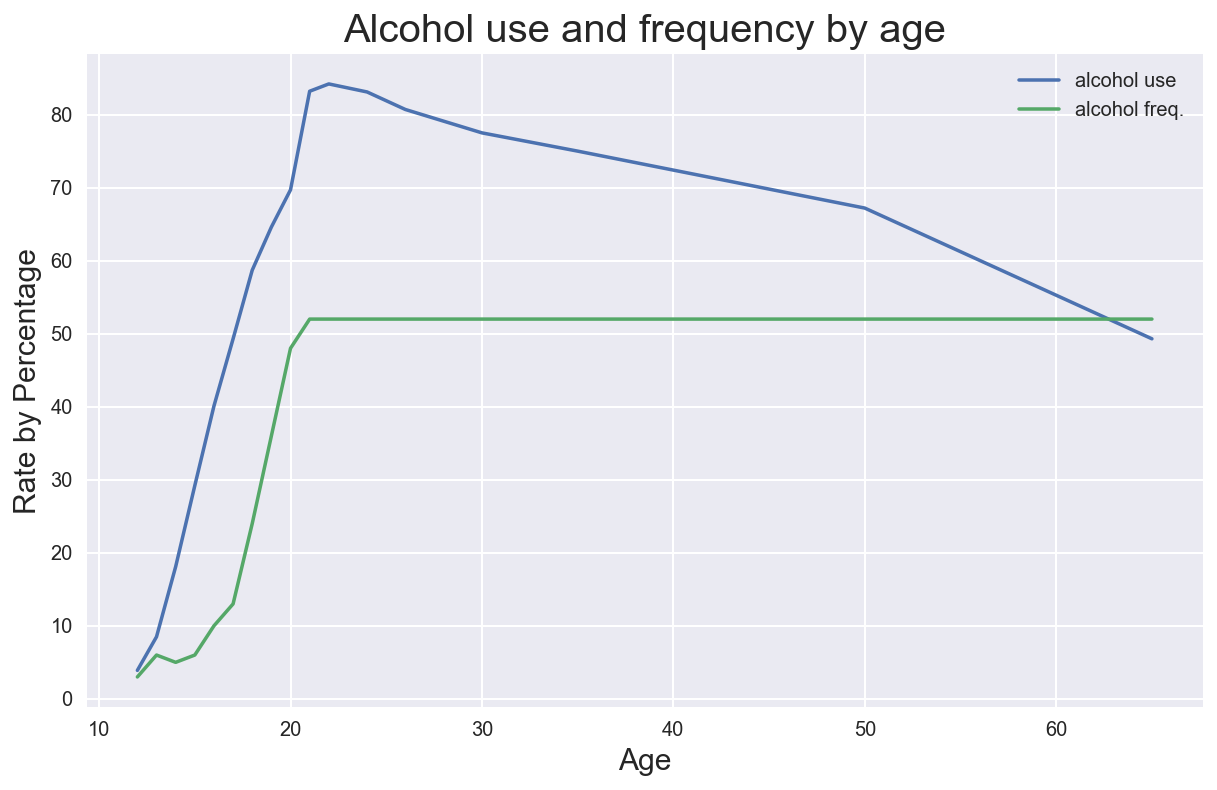

In [49]:
# First, see how alcohol use and frequency on all the ages.

alcohol= drug[['alcohol-use','alcohol-frequency']]


# create subplots with fig size
fig, ax2 = plt.subplots(figsize=(10, 6))

# Create a list of x-vals, so age between 12-20 bins will have same bins size to 25 - 60.
xvals = [12,13,14,15,16,17,18,19,20,21,22,24,26,30,35,50,65]

# create plot
_ = ax2.plot(xvals,alcohol['alcohol-use'], label='alcohol use')
_ = ax2.plot(xvals,alcohol['alcohol-frequency'], label='alcohol freq.')
ax2.legend()

# set title and x,y label.
plt.xlabel("Age", fontsize=15)
plt.ylabel("Rate by Percentage", fontsize=15)
plt.title("Alcohol use and frequency by age", fontsize=20)



As I can see, alcohol use and frequency are increasing until 20s, and it becomes steady or decreasing. 

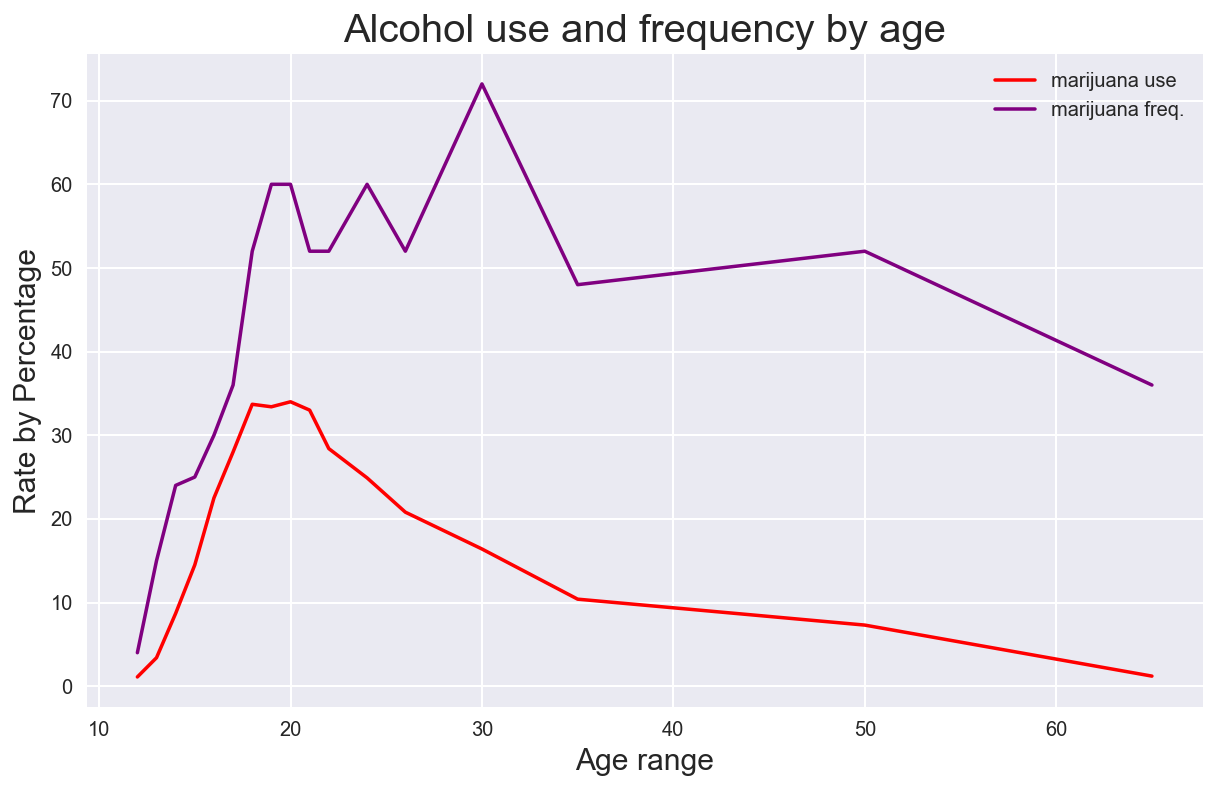

In [50]:
# create marijuana use and frequency data for plot.

marijuana = drug[['marijuana-use','marijuana-frequency']]

# create a canvas
fig, ax3 = plt.subplots(figsize=(10, 6))

# create plot
_ = ax3.plot(xvals, marijuana['marijuana-use'], label='marijuana use', color='red' )
_ = ax3.plot(xvals, marijuana['marijuana-frequency'], label='marijuana freq.', color='purple')
ax3.legend()


plt.xlabel('Age range',fontsize=15)
plt.ylabel('Rate by Percentage',fontsize=15)
plt.title('Alcohol use and frequency by age',fontsize=20)

Marijuana plot also shows that increase of marijuana use and frequency in teenage years. Then, I want to know that that age will be the best to start the program. 

In [51]:
# Create data frame just for underage and alcohol and marijuana use and frequency.
al_mari_underage = drug.iloc[:10, :6]

# To check, print out.
al_mari_underage

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency
0,12,2798,3.9,3.0,1.1,4.0
1,13,2757,8.5,6.0,3.4,15.0
2,14,2792,18.1,5.0,8.7,24.0
3,15,2956,29.2,6.0,14.5,25.0
4,16,3058,40.1,10.0,22.5,30.0
5,17,3038,49.3,13.0,28.0,36.0
6,18,2469,58.7,24.0,33.7,52.0
7,19,2223,64.6,36.0,33.4,60.0
8,20,2271,69.7,48.0,34.0,60.0
9,21,2354,83.2,52.0,33.0,52.0


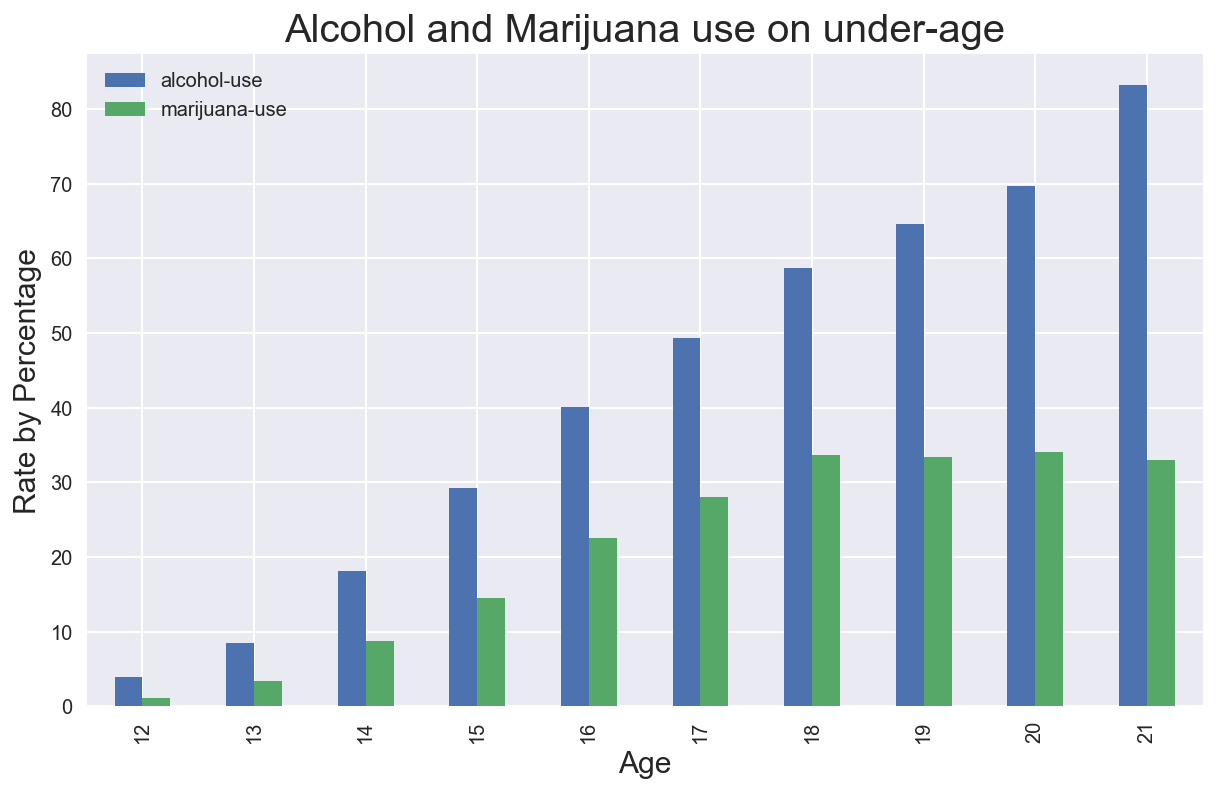

In [52]:

# Create bar plot for alcohol and marijuana use.

ax4 = al_mari_underage[['alcohol-use', 'marijuana-use']].plot(x=al_mari_underage['age'], kind='bar', figsize=(10,6))
ax4.legend()
# set title and x,y label.
ax4.set_title("Alcohol and Marijuana use on under-age", fontdict={'fontsize': 20})
ax4.set_ylabel('Rate by Percentage', fontdict={'fontsize': 15})
ax4.set_xlabel('Age', fontdict={'fontsize': 15})

On usage, on age 21, there are 80 % of teenagers have used alcohol and over 30% of teenagers have used marijuana. 

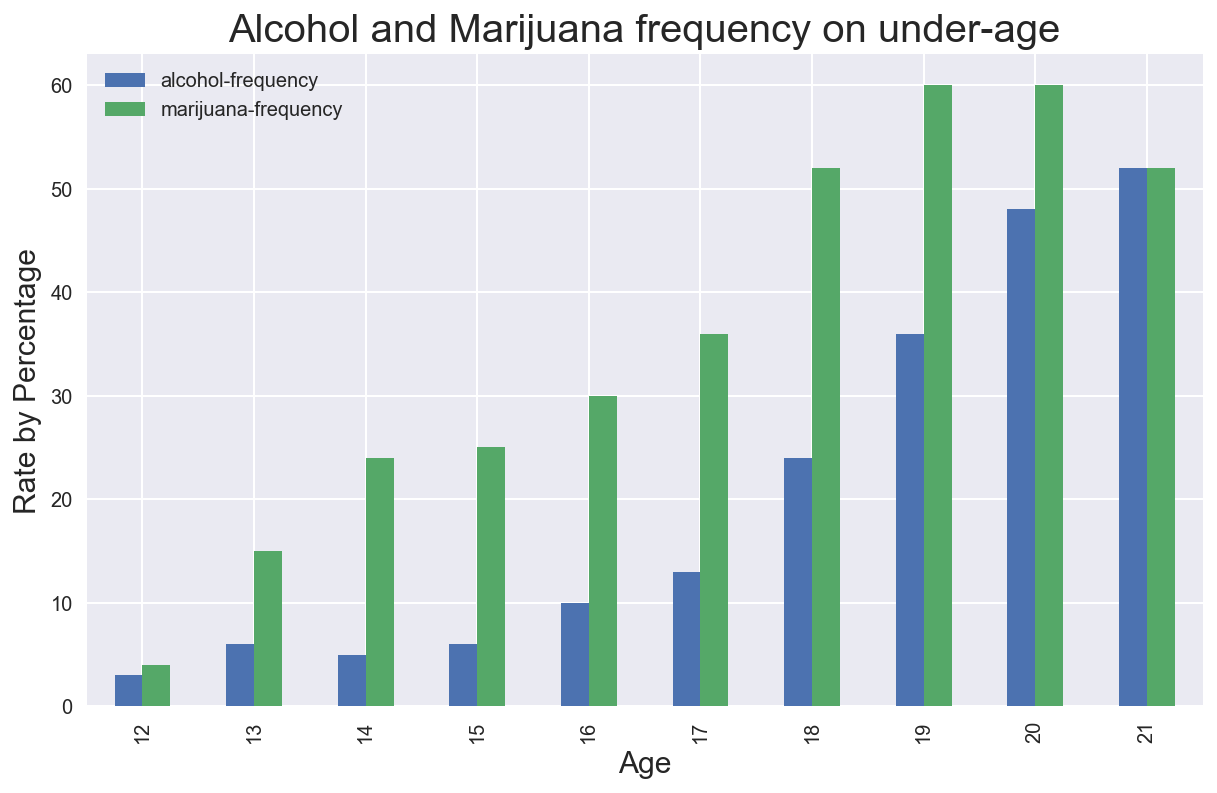

In [53]:

# Create bar plot for alcohol and marijuana frequency

ax5 = al_mari_underage[['alcohol-frequency', 'marijuana-frequency']].plot(x=al_mari_underage['age'], kind='bar', figsize=(10,6))
ax5.legend()
# set title and x,y label.
ax5.set_title("Alcohol and Marijuana frequency on under-age", fontdict={'fontsize': 20})
ax5.set_ylabel('Rate by Percentage', fontdict={'fontsize': 15})
ax5.set_xlabel('Age', fontdict={'fontsize': 15})

For alcohol and marijuana frequency, which is related to addiction, from age 17- 19, I can see higher increase on rate on frequent usage.

**Report**

Write up your report on what you have found regarding the hypothesis about the data you came up with.
* After legal age, which is over 21, alcohol and marijuana use and frequency does not increase like teenager period. Moreover, they are mostly steady or dropped after 21. 
* This can mean that people who drink alcohol and smoke marijuana would be decided before 21. 
* Same to frequency, people who drink alcohol and smoke marijuana frequently should get help before 21.
* Then, to start preventting underage drink and marijuana program, we need to check the highest growth on alcohol and marijuana use and frequency and start before that date.
* I should select before 17, which prove that many teenagers who use alcohol and marijuana can be addict on both. Therefore, 16 will be the best age.

...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

Are there outliers in the dataset? Define, in words, how you numerically define outliers.

* Outlier is a single or small number(comparing to total size) of observations where it has huge distant from other observations. 

In [54]:
# Print out the outliers in the dataset.

sat.describe()

,Rate,Verbal,Math,Difference
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


In [55]:
# When we see exercie 3 and 4, we can clearly see that there is a outlier on Math dataset. 
# Print out the outliers in the dataset.
sat_revised = sat.sort_values('Math')
sat_revised.head()

,State,Rate,Verbal,Math,Difference
27,OH,26,534,439,95
16,DC,56,482,474,8
15,SC,57,486,488,-2
13,GA,63,491,489,2
10,DE,67,501,499,2


In [56]:
# We can see that OH is an outlier on the Math.
# Remove the outliers from the dataset.
# 
sat_revised.reset_index(inplace=True, drop=True)
sat_revised.head()



,State,Rate,Verbal,Math,Difference
0,OH,26,534,439,95
1,DC,56,482,474,8
2,SC,57,486,488,-2
3,GA,63,491,489,2
4,DE,67,501,499,2


In [57]:
sat_revised.drop(sat.index[0], inplace=True)
sat_revised.head()

,State,Rate,Verbal,Math,Difference
1,DC,56,482,474,8
2,SC,57,486,488,-2
3,GA,63,491,489,2
4,DE,67,501,499,2
5,FL,54,498,499,-1


In [58]:

#Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. 
# What is different about them and why?
print(sat.describe())
print(sat_revised.describe())

            Rate      Verbal        Math  Difference
count  51.000000   51.000000   51.000000   51.000000
mean   37.000000  532.529412  531.843137    0.686275
std    27.550681   33.360667   36.287393   15.839811
min     4.000000  482.000000  439.000000  -30.000000
25%     9.000000  501.000000  503.000000   -6.000000
50%    33.000000  527.000000  525.000000    0.000000
75%    64.000000  562.000000  557.500000    4.500000
max    82.000000  593.000000  603.000000   95.000000
            Rate      Verbal        Math  Difference
count  50.000000   50.000000   50.000000   50.000000
mean   37.220000  532.500000  533.700000   -1.200000
std    27.785101   33.698695   34.120584    8.417668
min     4.000000  482.000000  474.000000  -30.000000
25%     9.000000  501.000000  505.250000   -6.000000
50%    33.500000  526.500000  525.500000    0.000000
75%    64.500000  562.000000  559.250000    4.000000
max    82.000000  593.000000  603.000000   15.000000


In [59]:
sat_median = np.median(sat['Math'])
sat_revised_median = np.median(sat_revised['Math'])

print("Previous math median was {}, median without outliers is {}.".format(sat_median, sat_revised_median))

sat_mean = np.mean(sat['Math'])
sat_revised_mean = np.mean(sat_revised['Math'])
print("Previous math mean was {}, mean without outliers is {}.".format(sat_mean, sat_revised_mean))


sat_std = np.std(sat['Math'])
sat_revised_std = np.std(sat_revised['Math'])
print("Previous math standard deviation was {}, standard deviation without outliers is {}.".format(sat_std, sat_revised_std))

Previous math median was 525.0, median without outliers is 525.5.
Previous math mean was 531.843137254902, mean without outliers is 533.7.
Previous math standard deviation was 35.92987317311408, standard deviation without outliers is 33.77765533603539.


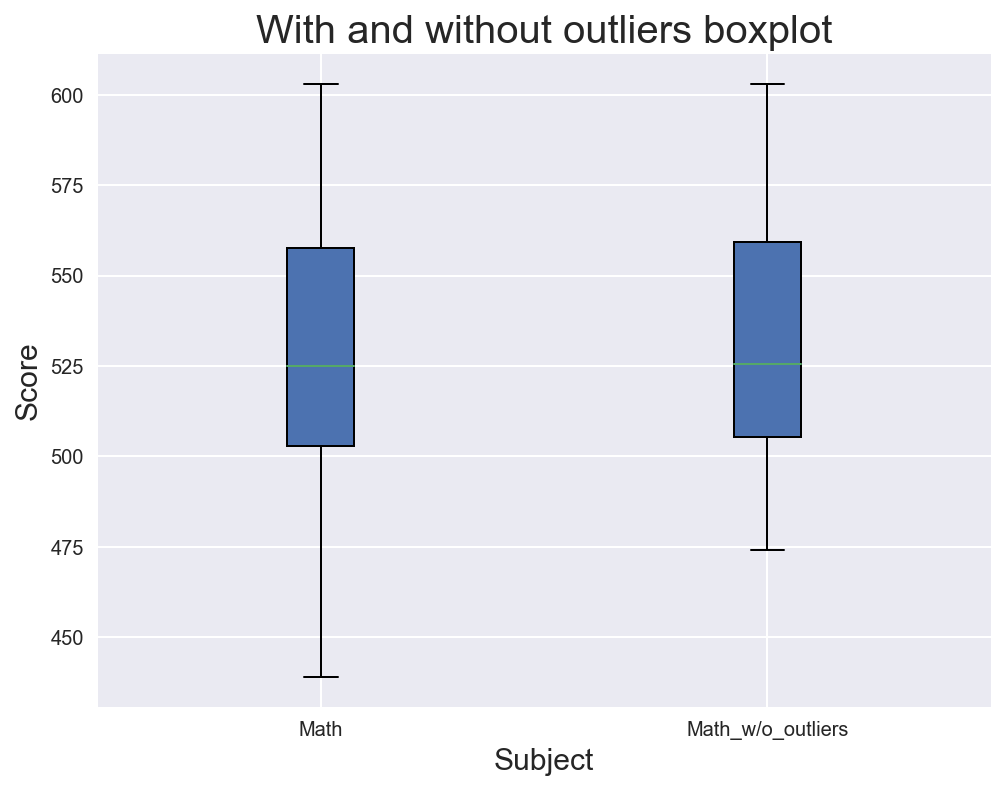

In [60]:
# create subplots with fig size
fig, ax1 = plt.subplots(figsize=(8, 6))

# create data tuple for both math and verbal.
mat=sat['Math'],sat_revised['Math']
# print(type(ver_mat))  --> double check

# labels for x-axis
labels=["Math", "Math_w/o_outliers"]


# create boxplot
mbox = ax1.boxplot(mat, patch_artist=True, labels=labels)

# set title and x,y label.
ax1.set_title("With and without outliers boxplot", fontdict={'fontsize': 20})
ax1.set_ylabel('Score', fontdict={'fontsize': 15})
ax1.set_xlabel('Subject', fontdict={'fontsize': 15})



Without outliers, both median are slightly different, but there are big different on mean and standard deviation. Moreover, when you see the graph, range of score becomes smaller and equally distribution on each ends.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [61]:
stats.spearmanr(math, verbal)

SpearmanrResult(correlation=0.90941251439034709, pvalue=2.6565430361617871e-20)

In [62]:
stats.pearsonr(math, verbal)

(0.89990931818110476, 2.735579353543464e-19)

Pearson correlation is showing linear relationship between two different variables, spearman rank correlation is the measuring relationship of two different variable by rank(1st, 2nd, 3rd).



### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [63]:
from scipy import stats
# Using stats.percentileofscore, I can get percentile of rate of each states.
# I make list comprehension and pd.series make series of data name rate_percentile.
rate_percentile = pd.Series([stats.percentileofscore(sat['Rate'],i) for i in sat['Rate']])

# create a new column, named 'rate_percentile', and add rate_percentile series on there.
sat['Rate_Percentile']=rate_percentile

In [64]:
sat.head()

,State,Rate,Verbal,Math,Difference,Rate_Percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.039216
2,MA,79,511,515,-4,96.078431
3,NY,77,495,505,-10,94.117647
4,NH,72,520,516,4,92.156863


In [65]:
CA = sat[sat["State"]=="CA"]["Rate_Percentile"]
for i in CA:
    print("California's percentile in Rate is {}.".format(i))

California's percentile in Rate is 55.88235294117647.


How is percentile related to the spearman rank correlation?

* Spearman rank correlation is basically transformed all values to percentile rank, and find correlation by ranking. Therefore, percentile ranks are values to spearman rank.

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Why might percentile scoring be useful for dealing with outliers?

* Just like z-score, percentile scoring limit the variable between 0 to 100. Therefore, even though there are outliers, we can see them on end of the rank.

In [66]:
# I choose heroin_frequency
heroin_freq = drug[['heroin-frequency']]

In [68]:
# add percentile data to dataframe
heroin_percentile = pd.Series([stats.percentileofscore(heroin_freq['heroin-frequency'],i) for i in heroin_freq['heroin-frequency']])
heroin_freq['percentile']= heroin_percentile

/Users/jasonjklim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
heroin_freq

,heroin-frequency,percentile
0,35.5,26.470588
1,35.5,26.470588
2,2.0,11.764706
3,1.0,5.882353
4,66.5,76.470588
5,64.0,64.705882
6,46.0,47.058824
7,180.0,94.117647
8,45.0,41.176471
9,30.0,17.647059


In [71]:
heroin_freq.set_index(drug['age'], inplace=True)

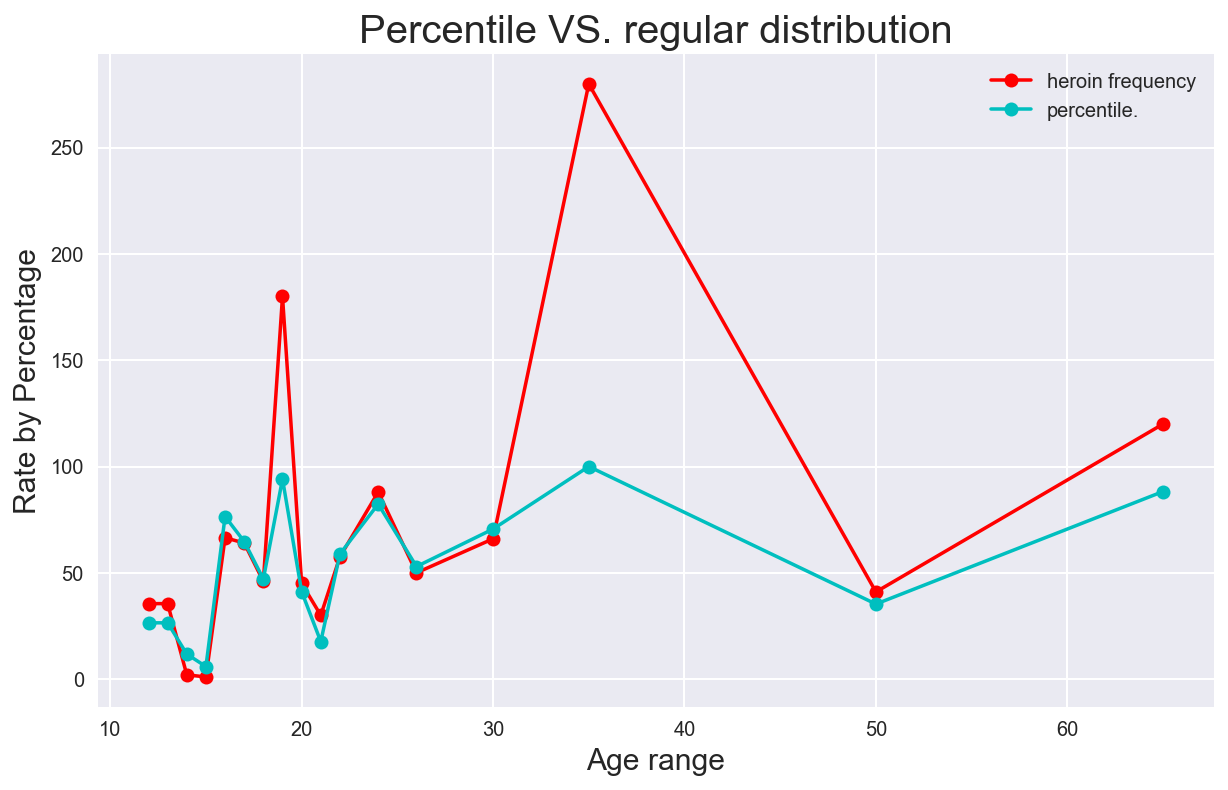

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

xvals = [12,13,14,15,16,17,18,19,20,21,22,24,26,30,35,50,65]
# create plot
_ = ax.plot(xvals, heroin_freq['heroin-frequency'], label='heroin frequency', linestyle='-', marker='o', color='r' )
_ = ax.plot(xvals, heroin_freq['percentile'], label='percentile.', linestyle='-', marker='o', color='c')
ax.legend()


plt.xlabel('Age range',fontsize=15)
plt.ylabel('Rate by Percentage',fontsize=15)
plt.title('Percentile VS. regular distribution',fontsize=20)

By percentile, the sharp is similar, but you can know the rank of frequency. Moreover, we can work on outliners and can see trends by percentile.